In [4]:
# 1. Load the raw dataset (e.g., CSV format) into a data analysis environment (Python with Pandas).
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

df=pd.read_csv(r'C:\Users\W4RCHILD\Desktop\data analysis\data\CWW TECH BOOTCAMP\Telco-Customer-Churn.csv')

print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [5]:
# 2. Examine the data for missing values, duplicates, and outliers.

# Converting dataset into numeral types and checking for missing values
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
# further Looking for missing values in the data set
df.loc[df ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


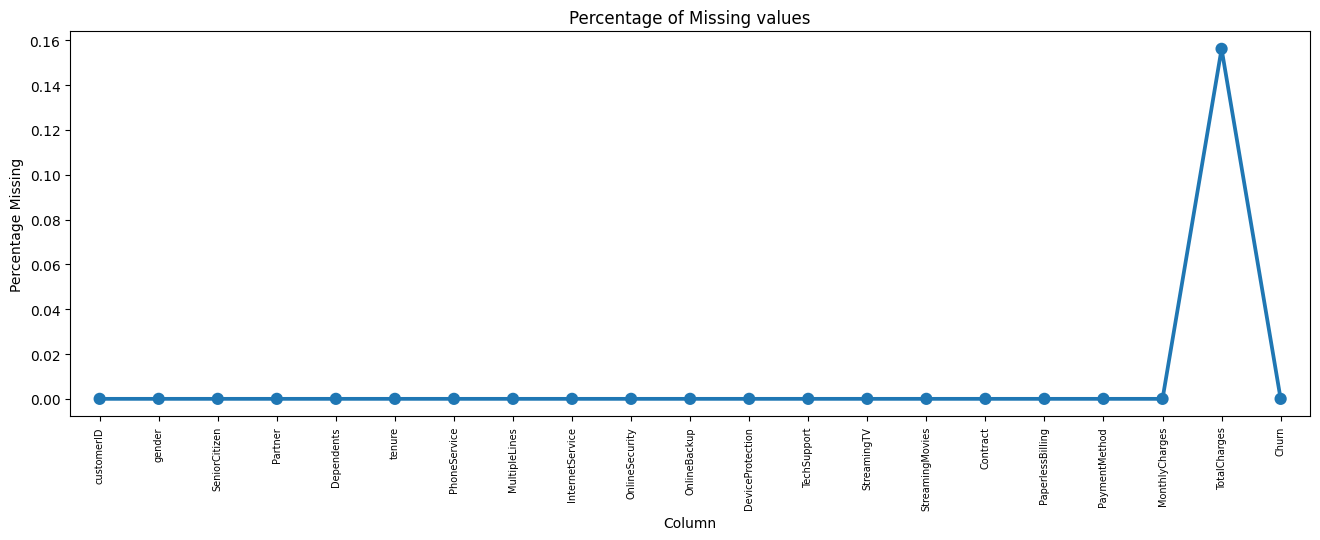

In [7]:
# Looking for outliers in our dataset

# Calculate the percentage of missing values
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage Missing']

# Create a pointplot
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage Missing', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.show()

we get to see there's alot of missing values in the Total Charges Column

In [8]:
'''3. Handle missing data through techniques like imputation (e.g., mean, median) or removal of
rows/columns.'''
# getting a look at our dataset statistically, through mean,standard deviation etc
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


we conclude that
Senior citizen is actually categorical hence the 25%-50%-75% distribution is not proper
We can also conclude that 75% of people have tenure.
Average Monthly charges are USD 64.76 whereas 25% of customers pay more than USD 89.85 per month

In [9]:
# df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
# plt.xlabel("Count", labelpad=14)
# plt.ylabel("Target Variable", labelpad=14)
# plt.title("Count of TARGET Variable per category", y=1.02)

In [10]:
# Removing Missing Values from Dataset
df.dropna(how = 'any', inplace = True)
df.fillna(0)
print(df.head(10))

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL        

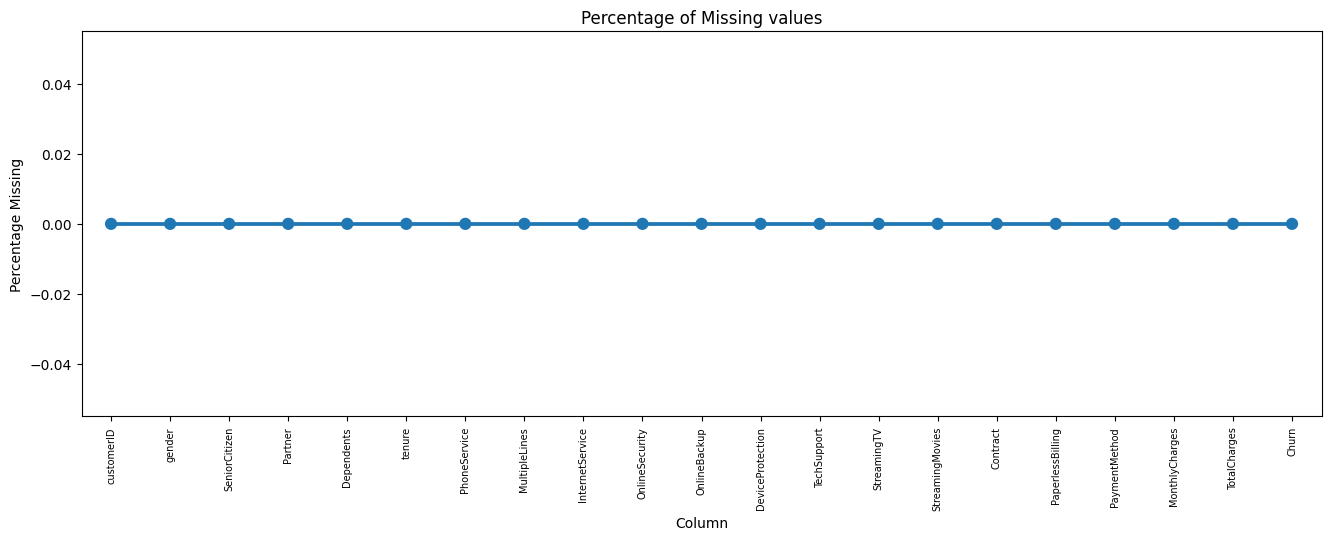

In [11]:
# CONFIRMATION VISUAL
# Calculate the percentage of missing values
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['Column', 'Percentage Missing']

# Create a pointplot
plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='Column', y='Percentage Missing', data=missing)
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing values")
plt.show()

we do a confirmation visual to see if the dataset is clean, and we conclude because there are no longer any missing values in the dataset

In [12]:
# 4. Address duplicates, if any, and remove unnecessary columns.

# Dropping Columns unnecessary during processing
df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


we drop customer id and tenure columns as we deem them unnecessary

In [13]:
# 5. Encode categorical variables (e.g., one-hot encoding) for modeling purposes.
# converting the categorical data into dummy variables with the getting dummies function.
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,29.85,29.85,True,False,False,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
1,0,56.95,1889.50,False,True,True,False,True,False,False,...,True,False,True,False,False,False,False,True,True,False
2,0,53.85,108.15,False,True,True,False,True,False,False,...,False,False,False,True,False,False,False,True,False,True
3,0,42.30,1840.75,False,True,True,False,True,False,True,...,True,False,True,False,True,False,False,False,True,False
4,0,70.70,151.65,True,False,True,False,True,False,False,...,False,False,False,True,False,False,True,False,False,True


    One-hot encoding is a method to represent categorical variables as binary vectors.
    For each unique category in a categorical variable, a new binary column (also called a "dummy variable") is created.
    If a data point belongs to a particular category, the corresponding column is set to 1, and all other columns are set to 0.
    This encoding effectively transforms a categorical variable with "n" unique categories into "n" binary columns.
    One-hot encoding is especially useful for categorical variables with no inherent ordinal relationship among categories (i.e., the categories have no specific order).

In [14]:
#  changing the character values for our ML model so hence we should convert it into binary numerical values i.e. Yes=1; No = 0
df['Churn'] = np.where(df.Churn == 'Yes',1,0)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


we further convert our churn column from 'YES' , 'NO' values to 1s and )s to help during visualisations

In [15]:
# 7. Perform descriptive statistics to summarize the dataset (e.g., mean, median, standard
# deviation).

df.describe()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,64.798208,2283.300441,0.265785
std,0.368844,30.085974,2266.771362,0.441782
min,0.000000,18.250000,18.800000,0.000000
25%,0.000000,35.587500,401.450000,0.000000
50%,0.000000,70.350000,1397.475000,0.000000
75%,0.000000,89.862500,3794.737500,1.000000
max,1.000000,118.750000,8684.800000,1.000000


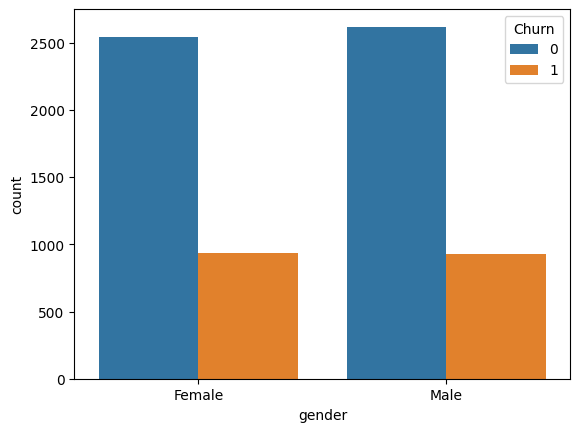

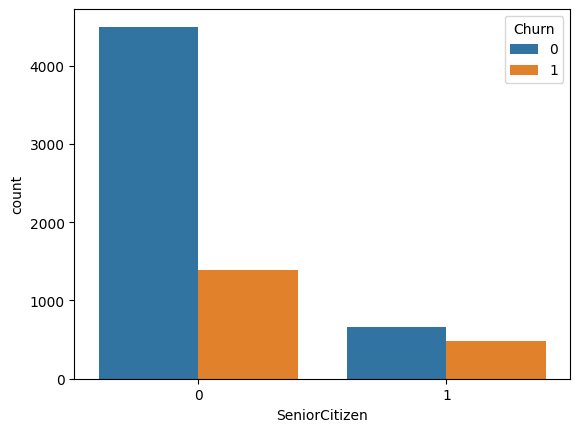

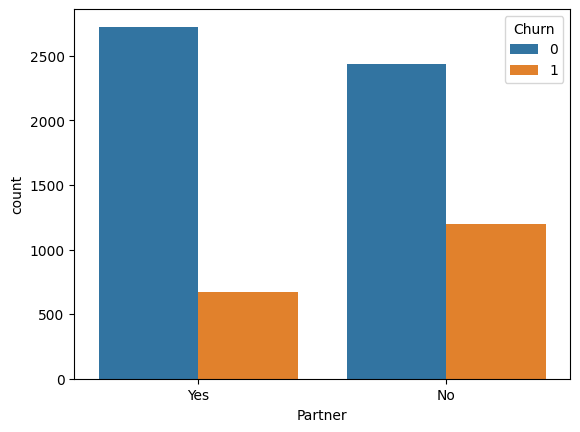

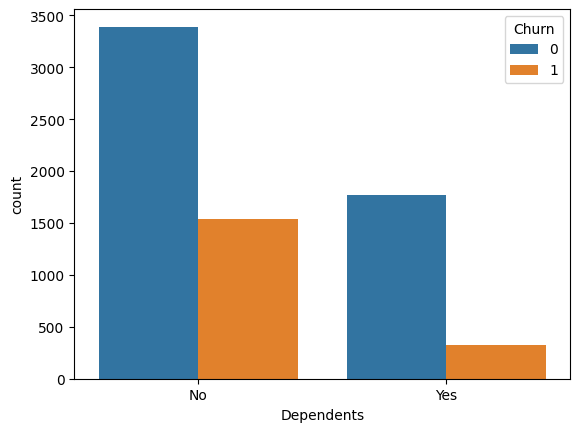

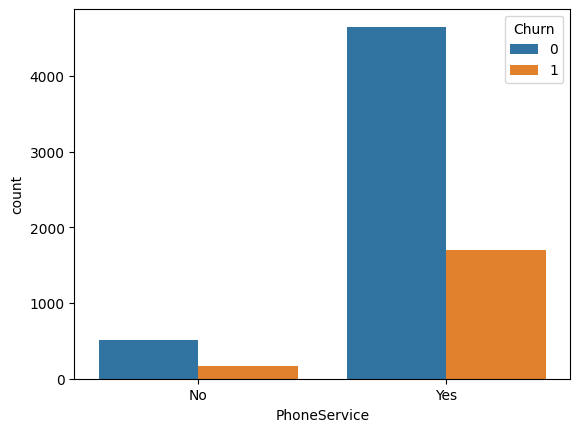

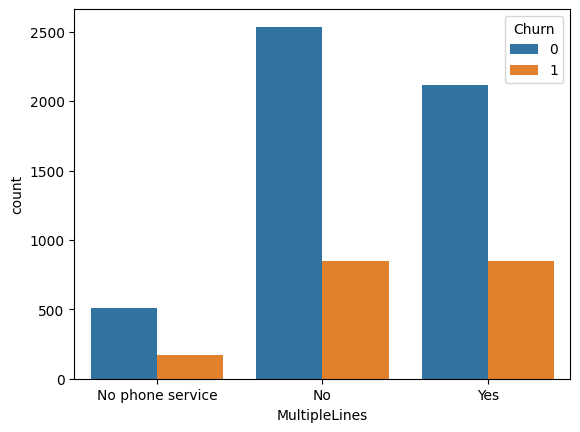

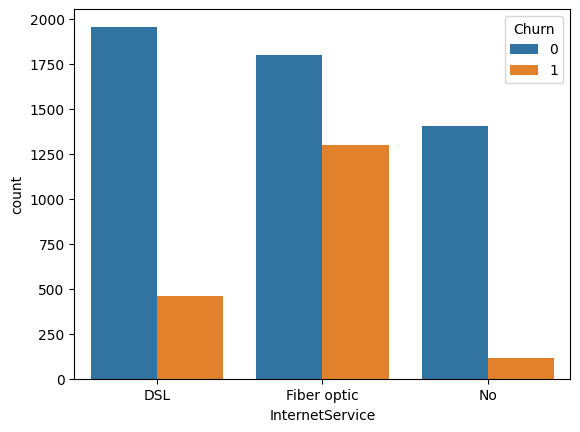

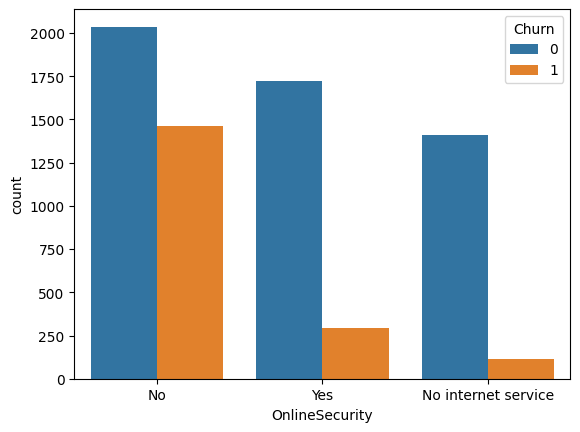

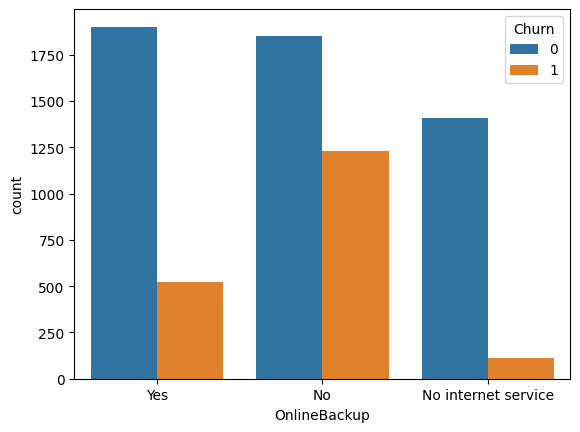

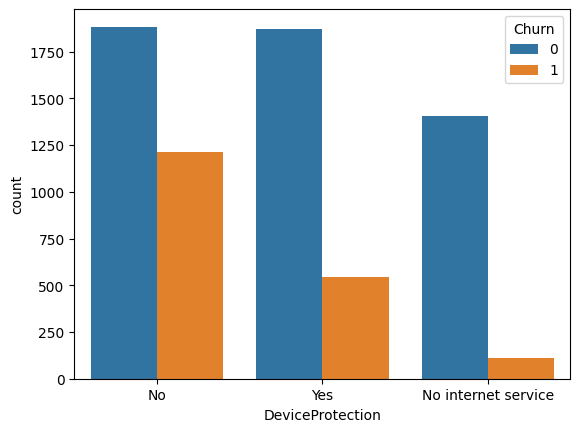

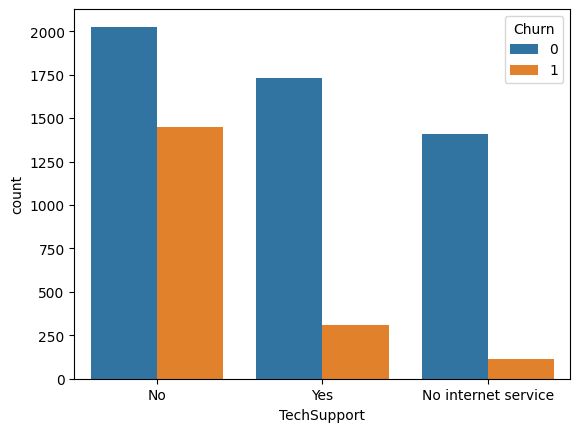

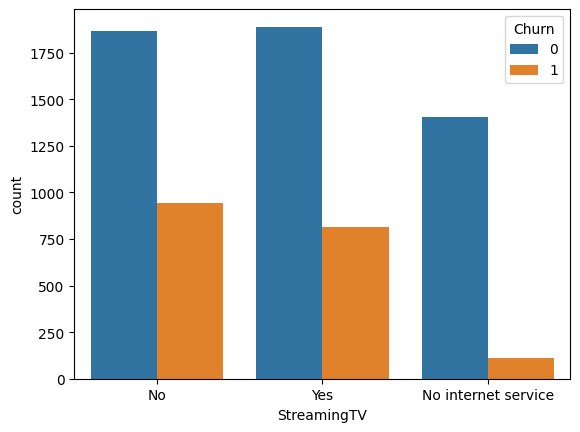

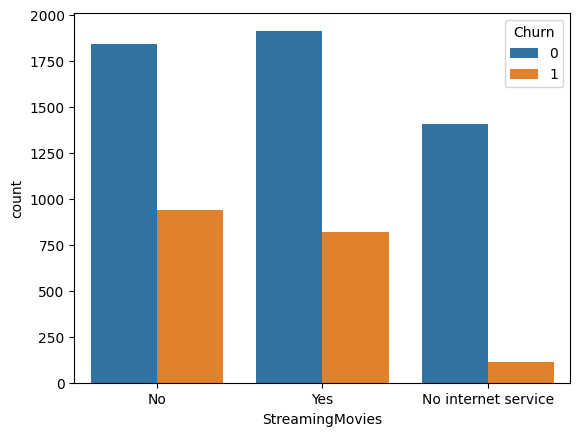

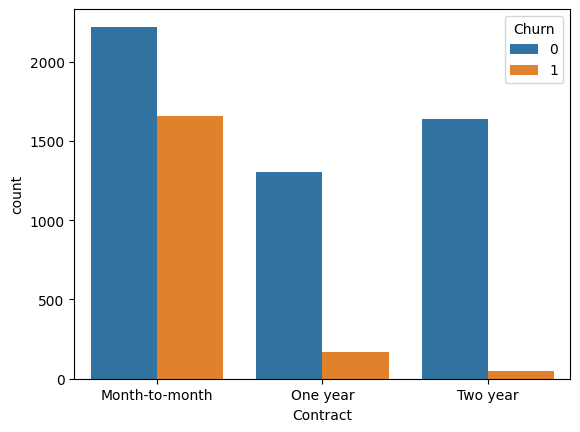

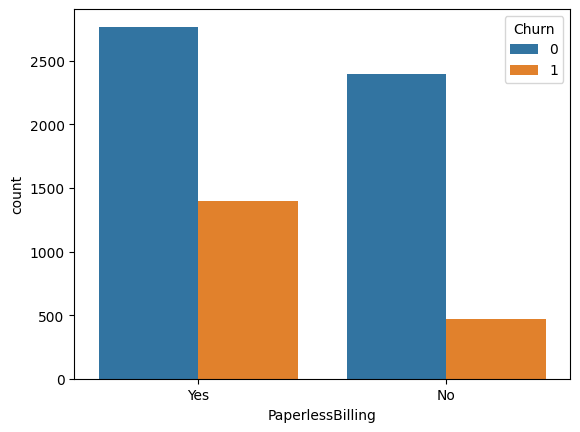

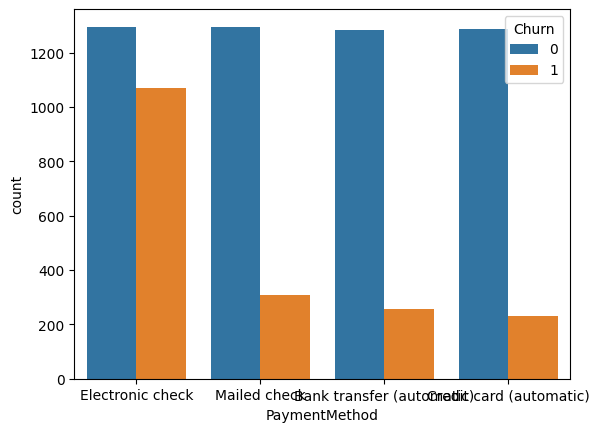

In [16]:
'''8. Explore the distribution of key variables, such as customer demographics (age, gender), usage
patterns (monthly charges, total charges), and churn status.'''
# Data Exploration
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

visualisations against churn and all other variables in the data set

<Axes: >

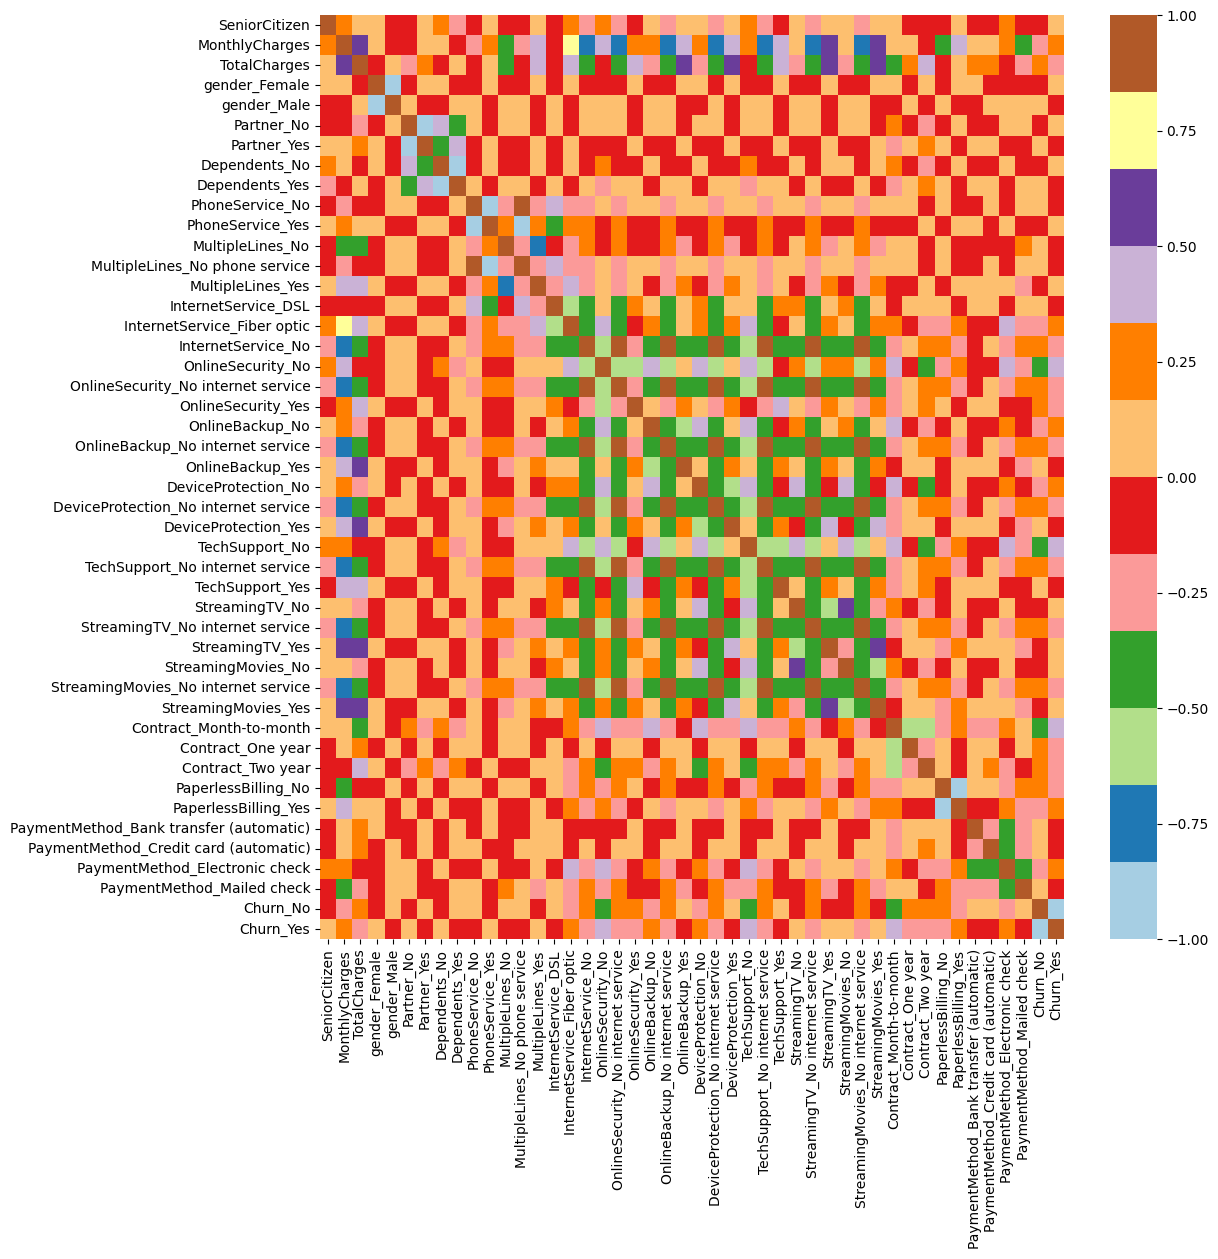

In [17]:
# 9. Calculate and visualize correlations between variables (e.g., using a heatmap).
plt.figure(figsize=(12,12))
sns.heatmap(df_dummies.corr(), cmap="Paired")

a heat map between the other variables  in the dataset

In [18]:
'''11. Create summary tables and statistics for various customer segments (e.g., by contract type,
payment method).'''

# Grouping by contract type
contract_groups =df.groupby('Contract')

# Grouping by payment method
payment_groups = df.groupby('PaymentMethod')

# Calculate average monthly charges for each contract type
avg_monthly_charges_by_contract = contract_groups['MonthlyCharges'].mean()

# Calculate total charges by payment method
total_charges_by_payment = payment_groups['TotalCharges'].sum()

# Create a summary table for average monthly charges by contract type
contract_summary = pd.DataFrame({'AvgMonthlyCharges': avg_monthly_charges_by_contract})

# Create a summary table for total charges by payment method
payment_summary = pd.DataFrame({'TotalCharges': total_charges_by_payment})

print(contract_summary)
print(payment_summary)

                AvgMonthlyCharges
Contract                         
Month-to-month          66.398490
One year                65.079416
Two year                60.872374
                           TotalCharges
PaymentMethod                          
Bank transfer (automatic)    4748279.90
Credit card (automatic)      4671593.35
Electronic check             4944903.25
Mailed check                 1691392.20


c:\Users\W4RCHILD\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


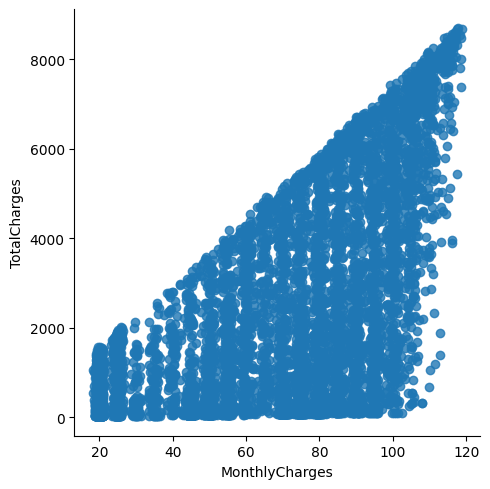

In [19]:
# 12 DATA VISUALISATIONS
# We will be making a regression plot between charges
sns.lmplot(data=df_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

scatter plot of the total charhes against the monthly charges to determine if the prices contribute to churning

C:\Users\W4RCHILD\AppData\Local\Temp\ipykernel_6776\4049538058.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn_Yes"] == 0) ],
C:\Users\W4RCHILD\AppData\Local\Temp\ipykernel_6776\4049538058.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn_Yes"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

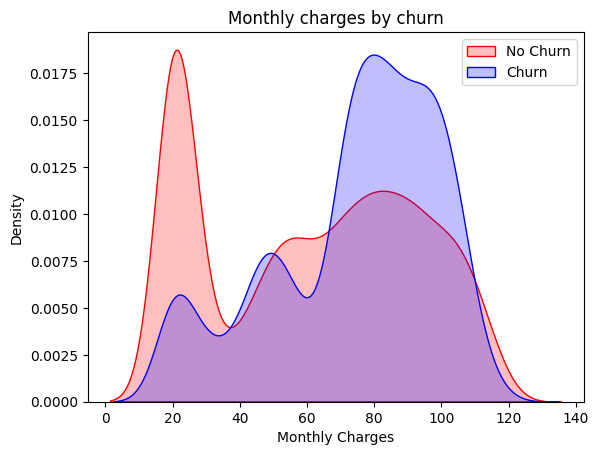

In [31]:
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn_Yes"] == 0) ],color="Red", shade = True)
Mth = sns.kdeplot(df_dummies.MonthlyCharges[(df_dummies["Churn_Yes"] == 1) ],ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')


C:\Users\W4RCHILD\AppData\Local\Temp\ipykernel_6776\27051825.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn_Yes"] == 0) ],


C:\Users\W4RCHILD\AppData\Local\Temp\ipykernel_6776\27051825.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn_Yes'] == 1) ],


Text(0.5, 1.0, 'Total charges by Churn')

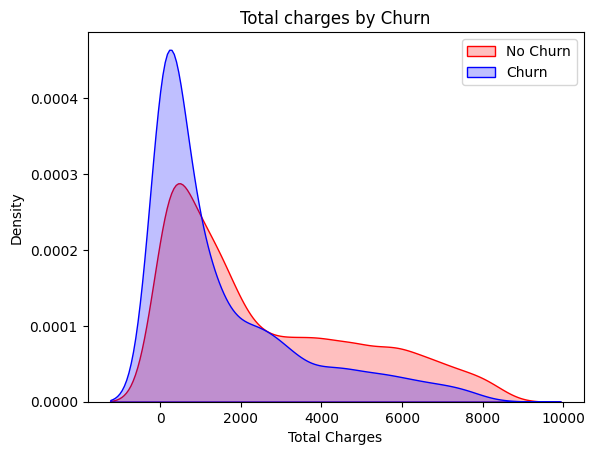

In [29]:
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies["Churn_Yes"] == 0) ],color="Red", shade = True)
Tot = sns.kdeplot(df_dummies.TotalCharges[(df_dummies['Churn_Yes'] == 1) ],ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by Churn')

 Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors 
 Higher Monthly Charge, Lower tenure, and Lower Total Charge are linked to High Churn.

CONCLUSIONS

1. Electronic check mediums are the highest churners
2. Contract Type – Monthly customers are more likely to churn because of no contract terms, as they are free-to-go customers.
3. No Online security, No Tech Support category are high churners
4. Non-senior Citizens are high churners